# Consumer optimization problem and Ramsey Model

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
from scipy import linalg
from scipy import interpolate 
import sympy as sm
import mpmath as mp

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Intertemporal consumer optimization

First I consider consumer with **utility function** under period t and  where:

**utility** is given by $$u(c_t) = \frac{c^{1-\theta}}{1-\theta} $$.

suppose consumer can live two periods: today and tomorrow, with the discount factor $\beta$, consumer's lifelong utility is:

$$ u(c_0,c_1) = \frac{c_0^{1-\theta}}{1-\theta} + \beta \frac{c_1^{1-\theta}}{1-\theta} $$

the customer is trying to solve utility maximization problem with **intertemporal budet constraint**

$$ c_0 + \frac{c_1}{1+r} = w_0 + \frac{w_1}{1+r} $$

where $w_0$ is the income for today, $w_1$ is the income tomorrow, r is discount rate

In [3]:
# define parameter values

theta = 0.4 # coefficient of risk aversion 
beta = 0.7 # discount factor
w0 = 20 # wage in period t
w1 = 10 # wage in period t+1
r = 0.05 # depreciation rate

From FOC I have $$ c_0^{-\theta} = \beta(1+r)c_1^{-\theta} $$
$$ c_0 + \frac{c_1}{1+r} = w_0 + \frac{w_1}{1+r} $$

In [4]:
# Define implicit functions using result from the FOC
def function_0(c0, c1): 
    """ 
    Implicit function derived from the Euler equation.
    
    Inputs:
    c0(float): consumption in period t
    c1(float): consumption in period t+1
    
    Returns:
    (float): overall consumption 
    
    """
    return c0**(-theta)-beta*(1+r)*c1**(-theta)
    
def function_1(c0, c1): 
    """
    Implicit function derived from the budget constraint.
    
    Inputs:
    w0(float): wage in period t
    w1(float): wage in period t+1
    c0(float): consumption in period t
    c1(float): consumption in period t+1
    
    Returns:
    (float): budget of period t+1 minus budget of period t
    """
    return w0+(1/(1+r))*w1-c0-(1/(1+r))*c1


In [5]:
# Fefine a function that optimize consumption bundle
def optimal_bundle(X):
    
    result = [function_0(X[0], X[1])]
    result.append(function_1(X[0], X[1]))
    return result

# give initial guess of c0 and c1
c0_initial, c1_initial = 1, 1
# apply fslove 
c0_star, c1_star = optimize.fsolve(func=optimal_bundle, x0=(c0_initial, c1_initial))

In [6]:
print ("Optimal choice of c0 is:", c0_star)
print ("Optimal choice of c1 is:", c1_star)

Optimal choice of c0 is: 20.487111357724327
Optimal choice of c1 is: 9.48853307438946


## Ramsey Model

I consider the **Ramsey Model** from macroecconomics 3, in which it has following sectors:

**Households** own capital, supply labor and consume
**Firm** give out capital and hire labor for production

there are 4 variables
**capital**: ${K_t}$
**labor**: ${L_t}$
**output**: ${Y_t}$
**consumption**: ${C_t}$

for individuals there are
output per capita ${y_t}$ = ${Y_t}$/ ${L_t}$, capital per capita ${k_t}$ = ${K_t}$/${L_t}$, consumption per capita ${c_t}$ = ${C_t}$/${L_t}$

**prices** are taken as given by households and firms 
${r_t}$: capital rent rate
${w_t}$: wage rate

return on capital owned by households, depreciation rate $\delta$>0
$$ {R_t} = 1 + {r_t} - {\delta} $$

**Firms** production function is given by:
$$ Y_t = F(K_t,L_t) = f(k_t)L_t $$

Firm profit maximization:
$$ max_{k_t,l_t} f(k_t)L_t - r_tK_t - w_tL_t $$

With FOC
$$ f'(k_t) = r_t $$
$$ f(k_t) - f'(k_t)k_t = w_t $$

consider the case with **Cobb-Douglas Production** function:
$$ F(K_t,L_t) = AK^{\alpha}L^{1-\alpha} $$

$$f(k_t) = Ak_t^{\alpha} $$

and now $$ r_t = A{\alpha}k_t^{\alpha-1}$$, $$w_t=  A(1-\alpha)k_t^{\alpha} $$

**Households** maximize utility from consumption:
$$ max_{c_t} \sum_{t=0}^{\infty} \beta^t u(c_t), u'>0, u''<0 $$ 

under resource constraint 
$$ k_{t+1} = R_tk_t + w_t - c_t $$

with given $k_0 $, $ ({R_t})_{t=0}^{\infty} $ and  $ ({w_t})_{t=0}^{\infty} $

euler equation $$\frac{u'(c_t)}{u'(c_{t+1})} = \beta{R_{t+1}} $$

set $\theta$ = 1 thus *CRRA utility* function becomes $$u(c_t) = \log( c_t )$$

## Analytical solution for Steady State

First I define all **symbols**:

In [7]:
u = sm.symbols('u')
c0 = sm.symbols('c_t')
c1 = sm.symbols('c_{t+1}')
beta = sm.symbols('beta')
R = sm.symbols('R_{t+1}')
r = sm.symbols('r_t')
delta = sm.symbols('delta')
A = sm.symbols('A')
alpha = sm.symbols('alpha')
k = sm.symbols('k_t')
w = sm.symbols('w_t')
k_star = sm.symbols('k^*')
c_star = sm.symbols('c^*')

r = A*alpha* k **(alpha-1)
w = A*(1-alpha)*k**alpha
R = 1 + r - delta
k1 = R*k + w - c0

utility function of 2 time period 

In [8]:
u0 = sm.log(c0)
u1 = sm.log(c1)

derive euler equation 

In [9]:
euler = sm.Eq(sm.diff(u0,c0)/sm.diff(u1,c1), beta*R)
euler

Eq(c_{t+1}/c_t, beta*(A*alpha*k_t**(alpha - 1) - delta + 1))

solve euler equation 

In [10]:
sol = sm.solve(euler, c1)
sm.Eq(c1,sol[0])

Eq(c_{t+1}, beta*c_t*(A*alpha*k_t**(alpha - 1) - delta + 1))

when under steady state $c_t = c_{t+1}$, $k_t = k_{t+1}$, thus

In [11]:
c_steadystate = sm.Eq(sol[0],c0)
c_steadystate

Eq(beta*c_t*(A*alpha*k_t**(alpha - 1) - delta + 1), c_t)

In [12]:
c_sol = sm.solve(c_steadystate,k)

In [13]:
sm.Eq(k_star,c_sol[0])

Eq(k^*, ((beta*(delta - 1) + 1)/(A*alpha*beta))**(1/(alpha - 1)))

Then I define the **steady state capital**

In [14]:
k_steadystate = sm.Eq(k,k1)
k_steadystate

Eq(k_t, A*k_t**alpha*(1 - alpha) - c_t + k_t*(A*alpha*k_t**(alpha - 1) - delta + 1))

and **solve** it

In [15]:
k_sol = sm.solve(k_steadystate,c0)[0]
sm.Eq(c_star,k_sol)

Eq(c^*, A*k_t**alpha - delta*k_t)

Define the model **parameters**:

In [16]:
parameter = {}

parameter['A'] = 1  # techonology level  
parameter['alpha'] = 0.4  # capital share of output 
parameter['delta'] = 0.1  # rate of capital depreciation 
parameter['beta'] = 0.7   # discount factor

## Numerical solution

In [17]:
# define production function:
def f(k):
    """
    capital stock per capita
    
    inputs:
    k_t: capital per capita in period t
    
    returns:
    y_t: production per capita in period t
    """
    A = parameter['A']   
    alpha = parameter['alpha']  
    
    return A*k**alpha

# define wage rate:
def w(k):
    """
    wage per capita
    
    inputs:
    k_t: capita per capita in period t
    
    returns:
    w_t: wage per capita in period t
    """
    
    A =parameter['A']  
    alpha = parameter['alpha']   
    return A*(1-alpha)*k**alpha

# define return on capital
def R(k):
    """
    return on capital 
    
    inputs:
    k_t: capital per capita in period t
    
    returns:
    R_t: return of capital in period t
    """
    A =parameter['A'] 
    alpha = parameter['alpha'] 
    delta = parameter['delta']
    
    return 1+ A*alpha*k**(alpha-1) - delta

define function which calculates the period 1 capital stock per capita.

In [18]:
def capital(k,c):
    """
    capital accumulation function
    
    Input:
        k_t: period_0 capital per capita
        c_t: period_0 consumption per capita
        
    Return:
        k_t+1: period_1 capital per capita
    """  
    
    A =parameter['A'] 
    alpha = parameter['alpha'] 
    delta = parameter['delta']
    
    return (R(k))*k + w(k) - c

define a function which calculates the period 1 consumption derived form euler equation.

In [19]:
def consumption(k,c):
    """
    consumption function 
    
    Input:
        k_t: period_0 capital per capita
        c_t: period_0 consumption per capita
        
    Return:
        c_t+1: period_1 consumption per capita        
    """ 
    A =parameter['A'] 
    alpha = parameter['alpha'] 
    delta = parameter['delta']
    beta = parameter['beta']
    
    return c*(beta*R(k))

define a function in which func_1, func_2= 0 in steady state

In [20]:
# function 1 express the change in capital stock per capita between 2 periods.
def func_1(k,c):
    """
    change of capital stock per capita in period t and period t+1
    
    Inputs:
        k_t: period_0 capital per capita
        c_t: period_0 consumption per capita
    
    Return: change in capital stock 
    """
    return capital(k,c) - k

# when under steady state capital(k,c) - k = 0 

In [21]:
# function 2 express the change in consumption per capita between 2 periods
def func_2(k,c):
    """
    change of consumption per capita in period t and period t+1
    
    Inputs:
        k_t: period_0 capital per capita
        c_t: period_0 consumption per capita
    
    Return: change in consumption
    """
    return consumption(k,c) - c

# when under steady state consumption(k,c) - c = 0

In [22]:
# defince steadystate function for solving optimal level of capital and consumption 
def steadystate(x):
    result = [func_1(x[0],x[1])]
    result.append(func_2(x[0],x[1]))
    return result

In [23]:
# make initial guess
k0,c0 = 3,3

# imply solver to calculate steady state
k_star, c_star = optimize.fsolve(steadystate,x0=(k0,c0))

print ("Numeric k*:  ", k_star)
print ("Numeric c*:  ", c_star)

Numeric k*:   0.6284352134711177
Numeric c*:   0.7675887250298413


define functions with capital k and consumption c on steady state:

In [24]:
# define steady state capital k _star
def k_star():
    # steady state capital stock k_star derive from analytical analysis result 
    A =parameter['A'] 
    alpha = parameter['alpha'] 
    delta = parameter['delta']
    beta = parameter['beta']
    
    return ((beta*(delta-1) + 1)/(A*alpha*beta))**(1/(alpha-1))

# steady state consumption c_star
def c_star():
    # steady state consumption c_star derived from analytical analysis result 
    A =parameter['A'] 
    alpha = parameter['alpha'] 
    delta = parameter['delta']
    beta = parameter['beta']
    
    return A*k_star()** alpha - delta*k_star()

In [25]:
print ("Analytic k*:", k_star())
print ("Analytic c*:", c_star())

Analytic k*: 0.6284352134762944
Analytic c*: 0.7675887250317597


In [26]:
# steady state production and saving from k_star and c_star
y_star = f(k_star())
s_star = (y_star - c_star())/ y_star
print ("steady state y*",y_star)
print ("steady state s*",s_star)

steady state y* 0.8304322463793891
steady state s* 0.07567567567567561


## Visualization 

In [27]:
#  locus for capital
def locus(k):
    """
    consumption when change of capital stock is 0
    inputs:
        k: capital stock per capita
        
    returns:
        c: consumption per capita
    """
    A =parameter['A'] 
    alpha = parameter['alpha'] 
    delta = parameter['delta']
    beta = parameter['beta']
    
    return f(k) - delta*k

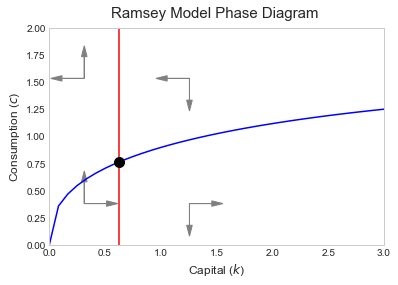

In [28]:
#  create a grid for plotting
xs = np.linspace(0, 500, 6000)

#  Constructing the generic phase diagram 
phase = plt.figure(figsize=(6,4))
plt.xlim(0,3)
plt.ylim(0,2)
plt.grid(False)
plt.xlabel([])

#  Adding the capital and consumption locii
plt.plot(xs, locus(xs), linestyle ='-', color='blue') 
plt.axvline(k_star(), linestyle = '-', color = 'red')
plt.plot(k_star(), c_star(), marker='o', markersize = 10, color ='black')

#  Adding arrows to indicate dynamics 
plt.arrow((1/2)*k_star(), (1/2)*c_star(), dx=0, dy=0.2, head_width = 0.05, head_length= 0.1, color = 'grey')
plt.arrow((1/2)*k_star(), (1/2)*c_star(), dx=0.2, dy=0, head_width = 0.05, head_length= 0.1, color = 'grey')
plt.arrow((1/2)*k_star(), 2*c_star(), dx=0, dy=0.2, head_width = 0.05, head_length= 0.1, color = 'grey')
plt.arrow((1/2)*k_star(), 2*c_star(), dx=-0.2, dy=0, head_width = 0.05, head_length= 0.1, color = 'grey')

plt.arrow(2*k_star(), (1/2)*c_star(), dx=0, dy=-0.2, head_width = 0.05, head_length = 0.1, color = 'grey')
plt.arrow(2*k_star(), (1/2)*c_star(), dx=0.2, dy=0, head_width = 0.05, head_length = 0.1, color = 'grey')
plt.arrow(2*k_star(), 2*c_star(), dx=0, dy=-0.2, head_width = 0.05, head_length = 0.1, color = 'grey')
plt.arrow(2*k_star(), 2*c_star(), dx=-0.2, dy=0, head_width = 0.05, head_length = 0.1, color = 'grey')

#  Adding axis labels and title
plt.xlabel('Capital (${k}$)', fontsize = 12)
plt.ylabel('Consumption (${c}$)', fontsize = 12)
plt.title('Ramsey Model Phase Diagram ', fontsize=15, pad = 10)
plt.show()

## Initial capital and consumption for balanced growth 

Alternatively, I use forward shooting algorithm to find the suitable initial bundle of capital per capita and consumption per capita so that they will converge to steady state level.

Algortithm can be explained below:

Giving initial level of capital, $k_0$, and a tolerance level, $\varepsilon$.

Set initial consumption bounderies: $ (\underline{c_0}, \bar{c_0}) $

If initial capital $c_0$ < $c^*$, consumption is within (0, $c^*$). $c_0$ > $c^*$  consumption will decrease until it reaches the equilibrium.

Suppose initial consumption $c_0 = \frac{(\underline{c_0}+\bar{c_0})}{2}$ and initial capital $k_0$.

Use the laws of motion to determine the change of capital per capita and consumption per capita from the initial values.

If the current values of capital and consumption are arbitrarily close to steady state values we have reached the the steady state and the algorithm breaks.

$k_0 \leq k^*$:

If $c \leq c^*$ continue by evaluate current values of capital consumption in laws of motion, when given $k > k^*$, the algorithm choose a higher initial level of consumption $\underline{c_0} = c_0$.
If $c>c^*$ the algorithm will choose a lower initial consumption; $\bar{c_0}=c_0$.

$k_0 > k^*$:

If $c \geq c^*$ continues to evaluate current values in laws of motion.
When $k<k^*$, the algorithm will choose a lower initial consumption, and set $\bar{c_0}=c_0$. If $c>c^*$ the algorithm will choose higher initial consumption $\underline{c_0}=c_0$.


In [29]:
# define the distance from the values of capital and consumption
def distance(k,c): 
    
    return np.sqrt((k-k_star())**2 + (c-c_star())**2)

In [32]:
saddlepath_max_iter = 1000 # Setting max number of iterations
saddlepath_T = 1000 # Setting max number of time periods to reach steady state

def inital_c():
    
    """
    Non-linear saddle path of the Ramsey model by 
    forward shooting algorithm. 
    
    Returns an initial consumption that will ensure convergence.
    """
    
    # i. set parameters and chosing initial capital per capita 
    k0 = 1.0
    delta = parameter['delta']
    
    
    # Defining upper bound and lower bound:
    if k0 < k_star() :
        c_low = 0
        c_high = f(k0) - delta*k0
    else:
        c_low = f(k0) - delta*k0
        c_high = f(k0) + k0*(1-delta)
    
    # path of c moves
    c0_path = np.nan * np.ones(saddlepath_max_iter)
    c_high_path = np.nan * np.ones(saddlepath_max_iter)
    c_low_path = np.nan * np.ones(saddlepath_max_iter)
    
    # algorithm:
    t = 0
    it = 0
    while it < saddlepath_max_iter:
        if t==0:
            c0 = (c_low + c_high) / 2
            k = k0
            c = c0
            
            c0_path[it] = c0
            c_low_path[it] = c_low
            c_high_path[it] = c_high
            
            it += 1
        t += 1

        k = capital(k,c)
        c = consumption(k,c)
        dist = distance(k,c)        
        
        if dist < 1e-8 or t > saddlepath_T: # distance must be higher than 0 
            break 
                  
        elif k0 <= k_star():
            if c <= c_star() and k <= k_star():
                continue # evaluate laws of motion. 
            else: 
                t = 0 # Restart, update initial consumption
                if k > k_star():
                    c_low = c0
                elif c > c_star():
                    c_high = c0
        else:
            if c >= c_star() and k >= k_star():
                continue # keep evaluating laws of motion
            else:
                t=0 # restarts time and update initial consumption guess.
                if k < k_star():
                    c_high = c0
                elif c < c_star():
                    c_low = c0
                    
    k0 = k0
    c0 = c0
    
    print(f'initial consumption c0 = {c0:.4f} ')
    print(f'initial capital k0 = {k0:.4f} ')
    return c0_path

In [33]:
c0_path_0 = inital_c()

initial consumption c0 = 1.0117 
initial capital k0 = 1.0000 


Text(0, 0.5, 'initial consumption (${c_0}$)')

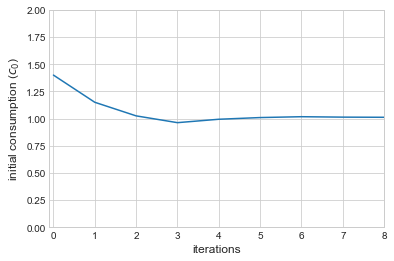

In [34]:
# Plotting the initial consumption guesses for given capital:
plt.plot(c0_path_0)
plt.axis([-0.1,8,0,2])

plt.xlabel('iterations', fontsize = 12)
plt.ylabel('initial consumption (${c_0}$)', fontsize = 12)

# Conclusion

In this project I have first solved the intertemporal consumer optimization problem numerically, then I have introduce Ramsey model with cobb-douglas production function of firms and log utility of consumers. We have found that both numerical result and analytical results for optimal value of k and c are 0.6284 and 0.7676 with given values of variables. I have also plotted the phase diagram of the model and the changing of consumption by giving initial of capital. I observed given initial values of capital $k_0$ = 1.000 and consumption $c_0$ = 1.0117 the economy will reach balanced growth path. 